In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read files
globulars = pd.read_fwf("galactic.glob.dat")
opens = pd.read_fwf("galactic.open.dat")

In [4]:
# remove the first row which is units, and reset indecies
globulars.drop([0], inplace=True)
opens.drop([0], inplace=True)

globulars.reset_index(drop=True,inplace=True)
opens.reset_index(drop=True,inplace=True)

In [5]:
# Convert object dtypes to float
globulars.LONGITUDE = pd.to_numeric(globulars.LONGITUDE, errors="coerce")
globulars.LATITUDE = pd.to_numeric(globulars.LATITUDE, errors="coerce")
opens.GALLONG = pd.to_numeric(opens.GALLONG, errors="coerce")
opens.GALLAT = pd.to_numeric(opens.GALLAT, errors="coerce")

In [6]:
# Change the range for longitude to be -180 degree to 180 degree
new_glob = np.where(globulars.LONGITUDE<=180, globulars.LONGITUDE,  globulars.LONGITUDE-360)
new_open = np.where(opens.GALLONG<=180, opens.GALLONG,  opens.GALLONG-360)

globulars.LONGITUDE = new_glob
opens.GALLONG = new_open

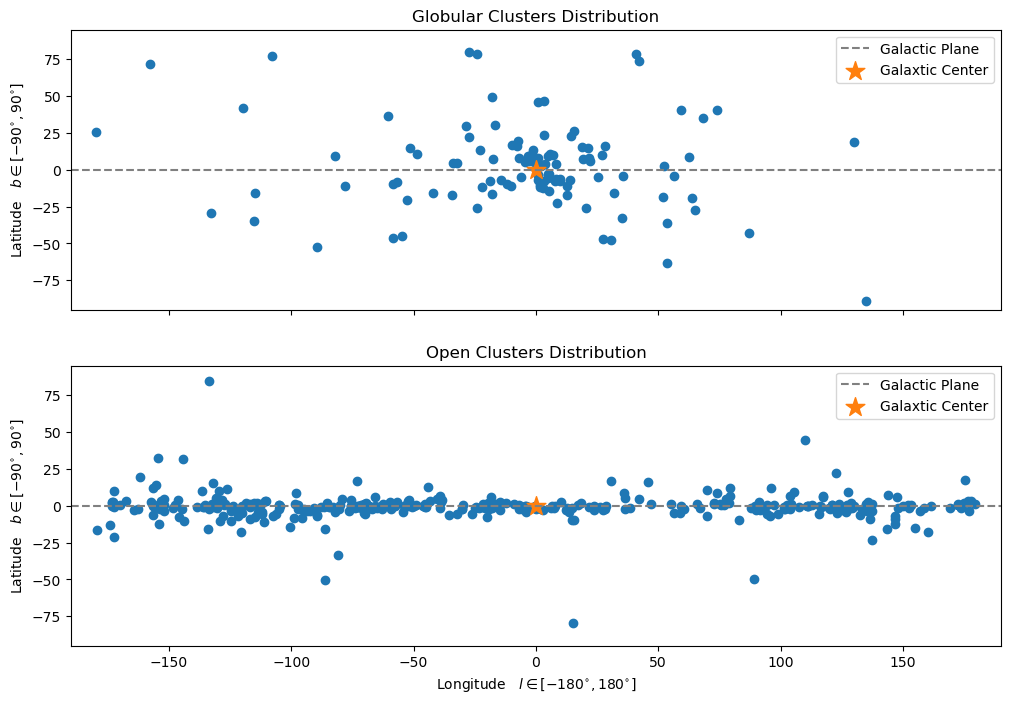

In [12]:
# plot next to each other
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 8),sharey=True,sharex=True)

ax1.scatter(globulars.LONGITUDE, globulars.LATITUDE)
ax2.scatter(opens.GALLONG, opens.GALLAT)
ax1.set_ylabel(r"Latitude   $b \in [-90^{\circ},90^{\circ}]$")
ax2.set_ylabel(r"Latitude   $b \in [-90^{\circ},90^{\circ}]$")
ax2.set_xlabel(r"Longitude   $l \in [-180^{\circ},180^{\circ}]$")

ax1.axhline(y=0,linestyle="--", color="gray", label="Galactic Plane")
ax2.axhline(y=0,linestyle="--", color="gray", label="Galactic Plane")
ax1.scatter(0,0,marker="*", s=200, label="Galaxtic Center")
ax2.scatter(0,0,marker="*", s=200, label="Galaxtic Center")

ax1.set_xlim(-190,190)
ax1.set_ylim(-95,95)

ax1.set_title("Globular Clusters Distribution")
ax2.set_title("Open Clusters Distribution")

ax1.legend()
ax2.legend()
plt.show()

## Discussion

Majority of open open clusters are concentrated on the galactic plane, while globular clusters are distributed more spatially. Specifically, there are only 8 open clusters with $|b|>25$. Although globular clusters have wider range of latitude, they are also concentrated towards the galactic center whereas open clustrs seem to be distributed equally along all longitude. There are only 9 globular clusters with $|l| > 100$, and the latitude of a cluster tends to be smaller near $l=0$.

The alignment between the galactic plan and open clusters indicates that many open clusters form in the galaxy and evolve with the galaxy because the glactic plane is where most dust and stars are located. Globular clusters, on the other hand, seem to have formed outside of the galaxy but became gravitationally bounded later, which explains why they are in a gravitaionally buonded regions but not where matter is concentrated.